In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.shape

(42000, 785)

In [4]:
numbers = np.arange(42000)
random.shuffle(numbers)
print(numbers)

[29631 23617 29420 ... 17485 10706 15394]


In [5]:
number = train_data.iloc[numbers[:100],1:]
number.shape

(100, 784)

In [6]:
figure = np.zeros((28*10,28*10))
for i in range(number.shape[0]):
    row = int(i/10)
    col = i%10
    figure[28*row:28*row+28,28*col:28*col+28] = number.iloc[i,:].values.reshape((28,28))

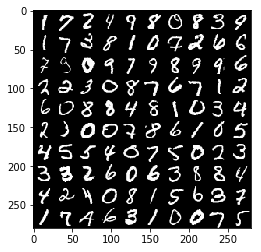

In [7]:
plt.imshow(figure,cmap='gray')

In [8]:
np.random.standard_normal((5,5))

array([[-0.58841817, -0.787568  ,  1.90469366, -0.58368033,  1.69016252],
       [-1.35318104,  1.34132243, -0.86239191,  0.11594565, -0.65810763],
       [ 1.00442424, -0.31729045,  0.97609967, -0.87052723, -0.48095296],
       [-0.17683945, -0.84980408,  0.99403725,  1.26486182,  0.07331305],
       [-0.34154372, -0.42250311, -0.66920361,  0.97076413,  0.07820603]])

In [9]:
def ith_sample(i,need_data=False,need_show=True):
    data = train_data.iloc[i,:]
    if need_show:
        plt.imshow(data.iloc[1:].values.reshape(28,28),cmap='gray')
    if need_data:
        return data
    else:
        return None

In [10]:
28*28

784

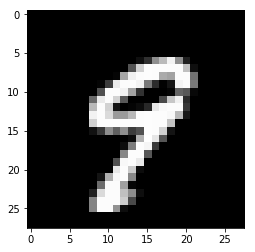

In [11]:
ith_sample(11)

In [18]:
import time
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
start = time.time()

In [19]:
epsilon = 0.12 # initialize all weighs between -0.12 ~ 0.12
W1 = np.random.random((784,784)) * epsilon * 2 - epsilon # map from input to hidden
b1 = np.random.random((784,1)) * epsilon * 2 - epsilon # bias1 
W2 = np.random.random((10,784)) * epsilon * 2 - epsilon # map from hidden to output
b2 = np.random.random((10,1)) * epsilon * 2 - epsilon # bias2
epoch = 100 # maximum training turns
alpha = 0.1 # learning rate
epoch_cost = np.zeros((epoch,))
lastac = 0
maxac = 0

W1_best = None
W2_best = None
b1_best = None
b2_best = None

In [12]:
def sigmoid(x): # sigmoid function 
    return 1/(1+np.power(np.e,-x))

def forward(x,W1,W2,b1,b2): # feed forward
    a = W1.dot(x)
    z = sigmoid(a+b1)
    b = W2.dot(z)
    y = sigmoid(b+b2)
    return a,z,b,y.reshape((-1,1))

def pred(X,W1,W2,b1,b2): # predict
    y_pred = np.zeros((2,X.shape[0]))
    for i in range(X.shape[0]):
        x = X[i,:] # initialize x
        _,_,_,y = forward(x.reshape((-1,1)),W1,W2,b1,b2)
        y_pred[:,i] = y.reshape((-1,))
    return y_pred

In [21]:
for turn in range(epoch):
    print('turn:',turn,end=' ')
    print('time:',timeSince(start),end=' ')
    for index in range(40000):
        x_y = ith_sample(index,need_data=True,need_show=False)
        x = x_y[1:].values.reshape((-1,1))/255
        y = np.zeros((10,1))
        y[x_y[0],0] = 1
        
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward
        
        cost = -y.T.dot(np.log(y_pred)) - (1-y.T).dot(np.log(1-y_pred)) # calculate cost
            
        #print('cost',cost)
        epoch_cost[turn] += cost # calculate cumulative cost of this epoch

        origin_W2 = W2.copy() # use origin W2 to update W1 and b1
        
        
        W2 -= alpha * (y_pred - y).dot(z.T)
        b2 -= alpha * (y_pred - y) 
        W1 -= alpha * origin_W2.T.dot(y_pred-y) * (z * (1-z)).dot(x.T)
        b1 -= alpha * origin_W2.T.dot(y_pred - y) * z * (1-z)
    
    ac = 0
    for index in range(40000,42000):
        if index % 300 == 0:
            time.sleep(2)
        x_y = ith_sample(index,need_data=True,need_show=False)
        x = x_y[1:].values.reshape((-1,1))/255
        y = x_y[0]
        
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward
        
        if y == y_pred.argmax():
            ac += 1
    
    
    print('cost:',epoch_cost[turn],end=' ')
    print('ac:{:.4f}%'.format(ac/2000*100))
    
    if ac > maxac:
        W1_best = W1.copy()
        W2_best = W2.copy()
        b1_best = b1.copy()
        b2_best = b2.copy()
        
        maxac = ac
        print('best performance ,record')    


print('prediction\n',pred(X,W1,W2,b1,b2))
print('ground-truth\n',Y)

turn: 0 time: 0m 1s cost: 19140.42635400512 ac:95.8500%
best performance ,record
turn: 1 time: 1m 54s 

KeyboardInterrupt: 

In [27]:
def pred_figure(i,cmp=True):
    x_y = ith_sample(i,need_data=True,need_show=True)
    x = x_y[1:].values.reshape((-1,1))/255
    _,_,_,y = forward(x,W1,W2,b1,b2)
    if cmp:
        print('pred',y.argmax())
        print('true',x_y[0])
    else:
        if y.argmax() == x_y[0]:
            return 1
        else:
            return 0

In [28]:
print(W1.shape)
print(W2.shape)
print(b1.shape)
print(b2.shape)

(784, 784)
(10, 784)
(784, 1)
(10, 1)


pred 5
true 5


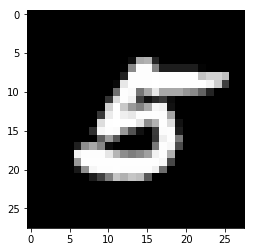

In [29]:
pred_figure(10100,cmp=True,)

In [ ]:
ac = 0
total = train_data.shape[0]
for i in range(total):
    if i % 1000 == 0:
        print('{},{:.4f}%'.format(i,ac/(i+1)*100))
    ac += pred_figure(i,cmp=False)

0,0.0000%


/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


1000,99.9001%
2000,99.9500%
3000,99.9667%
4000,99.9750%
5000,99.9800%
6000,99.9833%
7000,99.9857%
8000,99.9875%
9000,99.9889%
10000,99.9900%
11000,99.9909%
12000,99.9917%
13000,99.9923%
14000,99.9929%


KeyboardInterrupt: 

In [20]:
test_data = pd.read_csv('test.csv')

In [21]:
test_data.shape

(28000, 784)

In [22]:
def ith_test(i,need_data=False,need_show=True):
    data = test_data.iloc[i,:]
    if need_show:
        plt.imshow(data.iloc[0:].values.reshape(28,28),cmap='gray')
    if need_data:
        return data
    else:
        return None

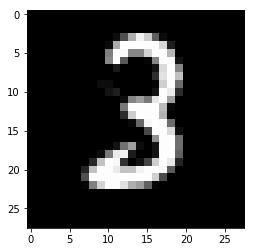

In [23]:
ith_test(4)

In [18]:
result = np.zeros((test_data.shape[0],1))
for i in range(result.shape[0]):
    x = ith_test(i,need_data=True,need_show=False)
    x = x.reshape((-1,1))/255
    _,_,_,y = forward(x,W1_best,W2_best,b1_best,b2_best)
    result[i,0] = y.argmax()

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [19]:
result = result.astype(np.int64)

In [20]:
result

array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]])

[0]


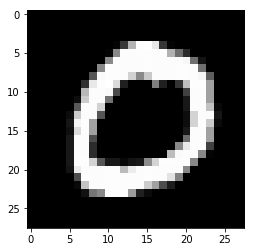

In [21]:
k = 111
ith_test(k,need_data=False,need_show=True)
print(result[k])

In [22]:
ret = pd.DataFrame(columns=['ImageId','Label'])

In [23]:
ret.ImageId = np.arange(1,test_data.shape[0]+1)

In [24]:
ret.Label = result

In [25]:
ret.to_csv('ret.csv',index=False)

In [15]:
np.save('W1.npy',W1_best)
np.save('W2.npy',W2_best)
np.save('b1.npy',b1_best)
np.save('b2.npy',b2_best)

NameError: name 'W1_best' is not defined

In [16]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')

In [43]:
x = np.random.random((784,1)) * 255

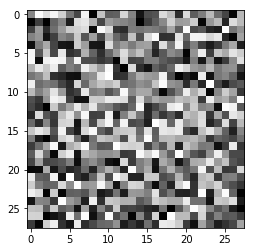

In [44]:
plt.imshow(x.reshape(28,28),cmap='gray')

In [54]:
y.shape

(10, 1)

In [52]:
W2.shape

(10, 784)

In [55]:
x

array([[0.52200711],
       [0.97726416],
       [0.85997979],
       [0.96202092],
       [0.81506189],
       [0.47274894],
       [0.27654177],
       [0.95342631],
       [0.01765075],
       [0.76828082],
       [0.37110089],
       [0.38557708],
       [0.83247526],
       [0.51826881],
       [0.08370951],
       [0.30466207],
       [0.32906585],
       [0.85181876],
       [0.73647224],
       [0.17421129],
       [0.8534561 ],
       [0.36470606],
       [0.4964562 ],
       [0.72479752],
       [0.42487733],
       [0.27116994],
       [0.02785007],
       [0.71843325],
       [0.01930407],
       [0.25421725],
       [0.00195342],
       [0.39769408],
       [0.52513789],
       [0.1154553 ],
       [0.86859113],
       [0.90239088],
       [0.69370073],
       [0.27967596],
       [0.61140306],
       [0.54715353],
       [0.52236572],
       [0.47219859],
       [0.0108849 ],
       [0.24499829],
       [0.37551785],
       [0.53740788],
       [0.81542759],
       [0.606

In [147]:
x = np.random.random((784,1)) * 255
x = x/255
start_x = x.copy()

In [154]:
for i in range(10000):
    a =  W1.dot(x)
    z = sigmoid(a)
    b = W2.dot(z)
    y = sigmoid(b)

    origin_x = x.copy()
    target = np.zeros((10,1))
    target[7,0] = 1
    p = x.shape[0]
    q = W1.shape[1]
    h = W2.shape[0]
    alpha = 10
    for i in range(p):
        totalD = ((y-target)*y*(1-y)).T.dot(W2.dot(z*(1-z)*W1[:,i].reshape((-1,1))))
        x[i,0] -= alpha * totalD
    c = np.linalg.norm(origin_x - x)
    print(np.linalg.norm(origin_x - x))

0.0001892816367140071
0.00018908876205392405
0.00018889627815958383
0.00018870418384789965
0.00018851247794061802
0.00018832115926413948
0.0001881302266497993
0.00018793967893332366
0.00018774951495550396
0.00018755973356144372
0.00018737033360114778
0.00018718131392914168
0.00018699267340462587
0.00018680441089117538
0.0001866165252570873
0.00018642901537519534
0.00018624188012271496
0.00018605511838139046
0.00018586872903755253
0.0001856827109817667
0.00018549706310922123
0.00018531178431924246
0.00018512687351576097
0.00018494232960696735
0.0001847581515053546
0.00018457433812772017
0.00018439088839533835
0.00018420780123336672
0.0001840250755715503
0.000183842710343693
0.0001836607044878817
0.0001834790569462843
0.00018329776666532483
0.00018311683259552303
0.00018293625369147738
0.00018275602891202982
0.0001825761572199108
0.0001823966375820745
0.0001822174689694082
0.0001820386503567805
0.00018186018072326946
0.00018168205905167014
0.00018150428432898413
0.00018132685554592742
0.

0.00013676083136130379
0.00013665991528749344
0.0001365591480990881
0.0001364585294704701
0.0001363580590767617
0.00013625773659432268
0.00013615756170022624
0.00013605753407252446
0.0001359576533905551
0.00013585791933397816
0.0001357583315838387
0.0001356588898219918
0.00013555959373122436
0.00013546044299509423
0.00013536143729829672
0.0001352625763263301
0.00013516385976562932
0.0001350652873034824
0.00013496685862811293
0.0001348685734287745
0.00013477043139530434
0.00013467243221887255
0.00013457457559107582
0.00013447686120465063
0.00013437928875329217
0.00013428185793140982
0.0001341845684343402
0.00013408741995829366
0.00013399041220031038
0.00013389354485851256
0.0001337968176315186
0.00013370023021917795
0.00013360378232196918
0.00013350747364130626
0.00013341130387939173
0.00013331527273944643
0.00013321937992530686
0.00013312362514182933
0.00013302800809463788
0.00013293252849018068
0.00013283718603577092
0.00013274198043952457
0.00013264691141052205
0.00013255197865848415

0.00010793408508788287
0.00010787138155428931
0.00010780875169163573
0.00010774619537233144
0.00010768371246911279
0.00010762130285499979
0.00010755896640313317
0.00010749670298720301
0.00010743451248108754
0.00010737239475881112
0.0001073103496949847
0.00010724837716427075
0.00010718647704160193
0.00010712464920234051
0.00010706289352218482
0.00010700120987679279
0.00010693959814250952
0.00010687805819562153
0.00010681658991292407
0.00010675519317132459
0.00010669386784831795
0.00010663261382125804
0.00010657143096804746
0.00010651031916674548
0.0001064492782958313
0.00010638830823388157
0.00010632740885999083
0.00010626658005323892
0.00010620582169311381
0.00010614513365941334
0.00010608451583219109
0.00010602396809166441
0.00010596349031859717
0.00010590308239365137
0.00010584274419800894
0.00010578247561309123
0.00010572227652044538
0.00010566214680212717
0.00010560208634014526
0.00010554209501720679
0.00010548217271577991
0.00010542231931895016
0.0001053625347099808
0.000105302818

8.858584217738918e-05
8.85439115205855e-05
8.850202158537692e-05
8.846017231357217e-05
8.841836364711987e-05
8.837659552792481e-05
8.833486789797728e-05
8.829318069960226e-05
8.825153387503837e-05
8.820992736668863e-05
8.816836111697671e-05
8.812683506866546e-05
8.808534916436269e-05
8.804390334690979e-05
8.800249755930217e-05
8.796113174463413e-05
8.791980584589702e-05
8.787851980649117e-05
8.783727356964458e-05
8.779606707901708e-05
8.775490027803817e-05
8.77137731104054e-05
8.767268552000401e-05
8.763163745051735e-05
8.759062884624245e-05
8.754965965099587e-05
8.750872980921724e-05
8.746783926499642e-05
8.742698796297597e-05
8.738617584750471e-05
8.734540286319094e-05
8.730466895488837e-05
8.726397406726544e-05
8.722331814549344e-05
8.718270113436237e-05
8.714212297908937e-05
8.710158362498251e-05
8.706108301728719e-05
8.702062110150164e-05
8.698019782309674e-05
8.693981312771403e-05
8.689946696117038e-05
8.685915926920479e-05
8.681888999789786e-05
8.677865909318002e-05
8.6738466501

7.513576294336105e-05
7.510592567767087e-05
7.507611305785972e-05
7.504632505377509e-05
7.501656163539906e-05
7.498682277267935e-05
7.495710843567891e-05
7.492741859443531e-05
7.489775321913412e-05
7.486811227994915e-05
7.483849574696888e-05
7.480890359078078e-05
7.477933578132906e-05
7.474979228923677e-05
7.472027308487413e-05
7.469077813862101e-05
7.46613074209747e-05
7.463186090259651e-05
7.460243855409616e-05
7.457304034607173e-05
7.454366624918295e-05
7.451431623431294e-05
7.448499027200977e-05
7.445568833328992e-05
7.442641038902233e-05
7.439715641011163e-05
7.436792636748768e-05
7.433872023229385e-05
7.430953797548219e-05
7.42803795681507e-05
7.425124498154978e-05
7.422213418687873e-05
7.419304715532813e-05
7.41639838581611e-05
7.413494426697554e-05
7.410592835278616e-05
7.407693608724822e-05
7.404796744174399e-05
7.401902238792914e-05
7.399010089720421e-05
7.396120294129528e-05
7.393232849188397e-05
7.390347752050491e-05
7.387464999904511e-05
7.384584589928525e-05
7.38170651930

6.537962312201795e-05
6.53573191921915e-05
6.533503126510059e-05
6.531275932361455e-05
6.529050335066514e-05
6.526826332914446e-05
6.524603924210045e-05
6.522383107258934e-05
6.520163880348808e-05
6.517946241793773e-05
6.515730189892998e-05
6.513515722966468e-05
6.511302839311461e-05
6.50909153725925e-05
6.506881815114507e-05
6.504673671193256e-05
6.502467103824e-05
6.500262111327732e-05
6.498058692028966e-05
6.495856844259097e-05
6.493656566340979e-05
6.491457856610215e-05
6.489260713413384e-05
6.487065135074249e-05
6.484871119928585e-05
6.482678666334015e-05
6.480487772624544e-05
6.478298437150842e-05
6.476110658260735e-05
6.473924434296404e-05
6.471739763618361e-05
6.469556644584566e-05
6.467375075560837e-05
6.465195054884699e-05
6.463016580936457e-05
6.4608396520801e-05
6.45866426667301e-05
6.456490423091019e-05
6.454318119700873e-05
6.452147354886503e-05
6.449978127016139e-05
6.447810434465954e-05
6.445644275622558e-05
6.443479648861932e-05
6.441316552575537e-05
6.439154985151428e

5.790218688860292e-05
5.788493016785011e-05
5.786768435174842e-05
5.7850449429846844e-05
5.783322539202233e-05
5.781601222770475e-05
5.779880992666164e-05
5.778161847877398e-05
5.776443787354829e-05
5.774726810081368e-05
5.773010915032512e-05
5.7712961011805946e-05
5.769582367505504e-05
5.767869712986581e-05
5.766158136602988e-05
5.7644476373388286e-05
5.7627382141731605e-05
5.7610298660834154e-05
5.7593225920689006e-05
5.757616391107206e-05
5.7559112621829006e-05
5.75420720428647e-05
5.752504216415729e-05
5.750802297555e-05
5.7491014466953435e-05
5.747401662841439e-05
5.745702944966185e-05
5.744005292094127e-05
5.74230870320028e-05
5.740613177283482e-05
5.738918713366193e-05
5.737225310433721e-05
5.7355329674851155e-05
5.733841683529586e-05
5.7321514575708306e-05
5.7304622886160964e-05
5.7287741756775816e-05
5.727087117747254e-05
5.725401113848539e-05
5.7237161629930164e-05
5.722032264182551e-05
5.720349416447511e-05
5.7186676187873514e-05
5.716986870221712e-05
5.715307169763576e-05
5

5.208722551359301e-05
5.2073446527568794e-05
5.2059675310517105e-05
5.2045911856021863e-05
5.203215615732292e-05
5.201840820779856e-05
5.20046680009913e-05
5.1990935530157156e-05
5.197721078880118e-05
5.196349377034318e-05
5.194978446808507e-05
5.193608287563034e-05
5.192238898634229e-05
5.1908702793700214e-05
5.18950242911031e-05
5.188135347214276e-05
5.186769033014259e-05
5.185403485868275e-05
5.184038705123379e-05
5.182674690128273e-05
5.181311440234409e-05
5.1799489547938005e-05
5.1785872331435676e-05
5.177226274660189e-05
5.175866078678815e-05
5.174506644568578e-05
5.173147971667343e-05
5.171790059344423e-05
5.170432906946055e-05
5.169076513838163e-05
5.167720879360549e-05
5.166366002899057e-05
5.16501188379007e-05
5.163658521399577e-05
5.162305915085538e-05
5.160954064220596e-05
5.1596029681529944e-05
5.158252626258243e-05
5.156903037883591e-05
5.155554202405534e-05
5.154206119184737e-05
5.152858787585792e-05
5.15151220697107e-05
5.150166376718687e-05
5.1488212961904004e-05
5.147

4.735633641134034e-05
4.73450924566828e-05
4.733385420930557e-05
4.732262166508475e-05
4.731139481940625e-05
4.7300173668057085e-05
4.7288958206492625e-05
4.7277748430360663e-05
4.726654433534292e-05
4.7255345916985615e-05
4.724415317092469e-05
4.7232966092802434e-05
4.7221784678255485e-05
4.721060892293062e-05
4.71994388224207e-05
4.7188274372385945e-05
4.717711556853577e-05
4.716596240644343e-05
4.7154814881900967e-05
4.714367299046157e-05
4.713253672778933e-05
4.7121406089570646e-05
4.7110281071525546e-05
4.7099161669187034e-05
4.708804787848727e-05
4.707693969494001e-05
4.7065837114319145e-05
4.7054740132263115e-05
4.704364874457494e-05
4.703256294679992e-05
4.702148273482705e-05
4.701040810419058e-05
4.699933905079878e-05
4.698827557024398e-05
4.697721765835838e-05
4.696616531080206e-05
4.695511852325678e-05
4.694407729158929e-05
4.6933041611522e-05
4.69220114786872e-05
4.691098688903027e-05
4.6899967838165134e-05
4.68889543219424e-05
4.687794633614986e-05
4.686694387636252e-05
4.

4.3430100247128445e-05
4.342075717861514e-05
4.341141841279415e-05
4.340208394686859e-05
4.339275377758424e-05
4.338342790206463e-05
4.3374106317225736e-05
4.336478902005104e-05
4.3355476007579206e-05
4.334616727673184e-05
4.333686282457487e-05
4.332756264798074e-05
4.3318266744086984e-05
4.3308975109701e-05
4.3299687742041403e-05
4.329040463798812e-05
4.328112579461112e-05
4.327185120877996e-05
4.32625808777026e-05
4.32533147982664e-05
4.324405296753278e-05
4.323479538248391e-05
4.322554204025993e-05
4.321629293770849e-05
4.320704807201381e-05
4.319780744004576e-05
4.318857103903467e-05
4.3179338865881774e-05
4.317011091767427e-05
4.316088719140794e-05
4.315166768419065e-05
4.3142452393144546e-05
4.3133241315056643e-05
4.3124034447240845e-05
4.311483178661426e-05
4.3105633330336886e-05
4.3096439075412525e-05
4.3087249018842035e-05
4.307806315784717e-05
4.306888148931803e-05
4.305970401048758e-05
4.3050530718331765e-05
4.304136161000921e-05
4.303219668248374e-05
4.302303593293669e-05
4

4.02276634535804e-05
4.021973375015691e-05
4.021180739346208e-05
4.02038843811438e-05
4.0195964711264964e-05
4.0188048381561726e-05
4.0180135389763574e-05
4.017222573391675e-05
4.0164319411694675e-05
4.0156416421119734e-05
4.014851675984546e-05
4.014062042579446e-05
4.0132727416924684e-05
4.012483773085978e-05
4.011695136567814e-05
4.010906831909543e-05
4.0101188588989844e-05
4.009331217327866e-05
4.008543906967297e-05
4.0077569276264294e-05
4.006970279080379e-05
4.006183961109685e-05
4.005397973511866e-05
4.004612316054102e-05
4.003826988552294e-05
4.0030419907729635e-05
4.002257322508175e-05
4.0014729835577234e-05
4.00068897368758e-05
3.999905292703352e-05
3.9991219403902e-05
3.9983389165285514e-05
3.997556220913234e-05
3.996773853332011e-05
3.995991813575509e-05
3.995210101429307e-05
3.994428716683398e-05
3.9936476591220636e-05
3.9928669285545375e-05
3.9920865247439605e-05
3.991306447501749e-05
3.9905266966108615e-05
3.989747271859934e-05
3.98896817303339e-05
3.988189399937099e-05
3

3.7478033191638487e-05
3.747121869049045e-05
3.7464406840483244e-05
3.745759764017753e-05
3.74507910878569e-05
3.744398718197563e-05
3.7437185921003705e-05
3.7430387303271606e-05
3.742359132730309e-05
3.7416797991391325e-05
3.7410007294140046e-05
3.740321923375995e-05
3.739643380875753e-05
3.738965101766407e-05
3.738287085875032e-05
3.737609333060761e-05
3.73693184315128e-05
3.736254615996504e-05
3.7355776514317606e-05
3.734900949313894e-05
3.7342245094751815e-05
3.733548331771335e-05
3.732872416032293e-05
3.732196762102919e-05
3.731521369837865e-05
3.730846239078363e-05
3.7301713696579016e-05
3.729496761428589e-05
3.7288224142426495e-05
3.7281483279398716e-05
3.727474502350271e-05
3.726800937337831e-05
3.7261276327378705e-05
3.7254545883960904e-05
3.724781804162655e-05
3.724109279872937e-05
3.7234370153823936e-05
3.722765010528627e-05
3.722093265165287e-05
3.721421779133607e-05
3.720750552277612e-05
3.720079584455189e-05
3.719408875488224e-05
3.718738425248695e-05
3.718068233571817e-0

3.5071961550165415e-05
3.5066048644728124e-05
3.506013786992158e-05
3.5054229224595414e-05
3.504832270744665e-05
3.50424183174519e-05
3.5036516053274706e-05
3.5030615913868215e-05
3.502471789792369e-05
3.501882200447311e-05
3.501292823208661e-05
3.500703657972834e-05
3.500114704624183e-05
3.499525963042722e-05
3.498937433098787e-05
3.4983491146958634e-05
3.497761007701432e-05
3.497173112004248e-05
3.496585427488014e-05
3.4959979540316815e-05
3.495410691521864e-05
3.4948236398422916e-05
3.4942367988691085e-05
3.493650168497538e-05
3.493063748608687e-05
3.4924775390735085e-05
3.4918915397913076e-05
3.4913057506369894e-05
3.490720171496377e-05
3.490134802256883e-05
3.4895496427946226e-05
3.488964692996762e-05
3.4883799527537375e-05
3.487795421946809e-05
3.4872111004554135e-05
3.48662698816823e-05
3.48604308496517e-05
3.4854593907393665e-05
3.4848759053674627e-05
3.4842926287389554e-05
3.483709560739732e-05
3.4831267012452146e-05
3.482544050151037e-05
3.481961607338732e-05
3.48137937269682

3.296845239123021e-05
3.296327127354465e-05
3.295809189366099e-05
3.295291425071227e-05
3.294773834381189e-05
3.2942564171950263e-05
3.293739173430201e-05
3.293222103004269e-05
3.292705205817826e-05
3.292188481782086e-05
3.291671930817423e-05
3.291155552819956e-05
3.290639347701983e-05
3.290123315393394e-05
3.289607455777383e-05
3.2890917687840844e-05
3.2885762543186995e-05
3.288060912290196e-05
3.287545742605665e-05
3.2870307451933306e-05
3.2865159199445684e-05
3.286001266778687e-05
3.285486785612785e-05
3.284972476348445e-05
3.2844583389025144e-05
3.283944373181278e-05
3.283430579107501e-05
3.282916956577213e-05
3.2824035055150334e-05
3.28189022582374e-05
3.281377117414586e-05
3.2808641802038186e-05
3.280351414112875e-05
3.279838819034729e-05
3.2793263948966175e-05
3.278814141602703e-05
3.2783020590642216e-05
3.2777901471980513e-05
3.277278405914248e-05
3.2767668351237486e-05
3.276255434739569e-05
3.275744204673689e-05
3.2752331448421905e-05
3.27472225515332e-05
3.2742115355231334e-0

3.1162992092128044e-05
3.115839742984407e-05
3.115380421127728e-05
3.114921243567536e-05
3.1144622102372016e-05
3.1140033210667096e-05
3.113544575985734e-05
3.1130859749226403e-05
3.112627517802952e-05
3.112169204558494e-05
3.1117110351346645e-05
3.111253009448736e-05
3.1107951274307283e-05
3.110337389016317e-05
3.1098797941305295e-05
3.1094223427069066e-05
3.108965034680028e-05
3.1085078699698544e-05
3.108050848513175e-05
3.107593970240173e-05
3.1071372350918044e-05
3.106680642977623e-05
3.106224193846486e-05
3.105767887613358e-05
3.1053117242240976e-05
3.1048557036099706e-05
3.104399825695797e-05
3.1039440904101625e-05
3.103488497685809e-05
3.103033047454565e-05
3.102577739656174e-05
3.102122574201028e-05
3.1016675510413694e-05
3.101212670101265e-05
3.100757931307384e-05
3.100303334589864e-05
3.099848879898569e-05
3.099394567142546e-05
3.098940396265621e-05
3.0984863671989415e-05
3.0980324798721066e-05
3.097578734203332e-05
3.097125130146721e-05
3.096671667629297e-05
3.09621834657067

2.9572419747942016e-05
2.956831015901478e-05
2.956420178530543e-05
2.956009462629308e-05
2.9555988681394492e-05
2.955188395003476e-05
2.954778043175951e-05
2.9543678125875096e-05
2.953957703188347e-05
2.9535477149226913e-05
2.9531378477454058e-05
2.9527281015892854e-05
2.9523184763987667e-05
2.9519089721260606e-05
2.9514995887096095e-05
2.95109032610466e-05
2.950681184242129e-05
2.950272163079764e-05
2.9498632625514085e-05
2.9494544826113992e-05
2.9490458231975443e-05
2.9486372842548168e-05
2.9482288657404145e-05
2.9478205675832686e-05
2.9474123897460558e-05
2.9470043321556423e-05
2.946596394768249e-05
2.9461885775268246e-05
2.945780880382484e-05
2.945373303265538e-05
2.94496584613347e-05
2.944558508929837e-05
2.944151291606641e-05
2.943744194095077e-05
2.9433372163431723e-05
2.942930358315249e-05
2.9425236199357115e-05
2.9421170011576433e-05
2.9417105019176474e-05
2.9413041221833517e-05
2.940897861880963e-05
2.940491720964669e-05
2.940085699382278e-05
2.939679797062035e-05
2.939274013

2.813782620857125e-05
2.8134128995735912e-05
2.8130432815044824e-05
2.8126737666170275e-05
2.81230435485332e-05
2.8119350461736928e-05
2.8115658405336478e-05
2.811196737900995e-05
2.8108277382125626e-05
2.8104588414327812e-05
2.8100900475158226e-05
2.809721356423499e-05
2.8093527681014444e-05
2.8089842825140193e-05
2.8086158996065806e-05
2.8082476193481033e-05
2.8078794416834088e-05
2.8075113665821338e-05
2.8071433939764123e-05
2.80677552384692e-05
2.8064077561348743e-05
2.806040090803094e-05
2.8056725278061154e-05
2.8053050670986684e-05
2.8049377086383564e-05
2.8045704523736168e-05
2.804203298279719e-05
2.8038362462851652e-05
2.8034692963674608e-05
2.8031024484851988e-05
2.8027357025777077e-05
2.802369058610367e-05
2.8020025165359288e-05
2.801636076322268e-05
2.801269737912497e-05
2.8009035012592044e-05
2.8005373663345166e-05
2.8001713330787286e-05
2.7998054014736445e-05
2.7994395714476967e-05
2.7990738429758686e-05
2.7987082159981717e-05
2.7983426904803886e-05
2.79797726638146e-05
2.

2.684347428625644e-05
2.6840128886376927e-05
2.683678437110249e-05
2.68334407399794e-05
2.6830097992772024e-05
2.682675612906016e-05
2.6823415148444854e-05
2.682007505065308e-05
2.681673583527604e-05
2.6813397501974166e-05
2.6810060050331724e-05
2.680672348001543e-05
2.6803387790732445e-05
2.6800052982027837e-05
2.6796719053579946e-05
2.6793386005015053e-05
2.6790053836079084e-05
2.6786722546315267e-05
2.6783392135319402e-05
2.6780062602802873e-05
2.677673394846345e-05
2.6773406171895853e-05
2.677007927265149e-05
2.676675325048393e-05
2.676342810495796e-05
2.6760103835790346e-05
2.6756780442675447e-05
2.6753457925032613e-05
2.675013628276876e-05
2.6746815515447162e-05
2.6743495622558722e-05
2.6740176603944286e-05
2.6736858459106887e-05
2.6733541187771913e-05
2.6730224789628263e-05
2.6726909264147205e-05
2.6723594611240967e-05
2.6720280830278386e-05
2.671696792107062e-05
2.6713655883185508e-05
2.6710344716329253e-05
2.6707034420139983e-05
2.6703724994307564e-05
2.6700416438325154e-05
2.

2.568449576665402e-05
2.568144924317417e-05
2.5678403485431004e-05
2.567535849298545e-05
2.567231426564032e-05
2.5669270803089443e-05
2.5666228105030556e-05
2.566318617119742e-05
2.5660145001146674e-05
2.5657104594724563e-05
2.5654064951681612e-05
2.5651026071575304e-05
2.5647987954256636e-05
2.5644950599340845e-05
2.5641914006426755e-05
2.5638878175445835e-05
2.5635843105944777e-05
2.5632808797696807e-05
2.5629775250386024e-05
2.562674246373808e-05
2.5623710437419717e-05
2.562067917126633e-05
2.561764866477471e-05
2.5614618917746283e-05
2.5611589929971043e-05
2.560856170098604e-05
2.5605534230642227e-05
2.5602507518625226e-05
2.559948156458988e-05
2.5596456368257685e-05
2.5593431929361198e-05
2.5590408247597922e-05
2.5587385322694922e-05
2.55843631542077e-05
2.5581341742087555e-05
2.557832108594887e-05
2.5575301185405332e-05
2.557228204034915e-05
2.5569263650248923e-05
2.5566246015033366e-05
2.5563229134259627e-05
2.5560213007697383e-05
2.5557197635137357e-05
2.5554183016171875e-05
2.

2.462667448743402e-05
2.462388756939601e-05
2.462110131886159e-05
2.4618315735486557e-05
2.461553081902476e-05
2.4612746569317313e-05
2.4609962986057104e-05
2.4607180068981427e-05
2.4604397817911358e-05
2.4601616232476394e-05
2.4598835312593933e-05
2.4596055057921675e-05
2.4593275468155542e-05
2.459049654322453e-05
2.4587718282686026e-05
2.458494068652867e-05
2.4582163754279206e-05
2.4579387485769135e-05
2.4576611880820114e-05
2.4573836939066015e-05
2.4571062660473136e-05
2.456828904453644e-05
2.456551609119931e-05
2.4562743800154006e-05
2.4559972171124036e-05
2.4557201203945888e-05
2.4554430898200553e-05
2.455166125385426e-05
2.4548892270657286e-05
2.454612394821636e-05
2.4543356286339768e-05
2.454058928490347e-05
2.4537822943439348e-05
2.4535057261861717e-05
2.4532292239967958e-05
2.452952787745071e-05
2.452676417400919e-05
2.452400112951295e-05
2.452123874358621e-05
2.451847701613407e-05
2.4515715946875486e-05
2.4512955535425648e-05
2.4510195781746783e-05
2.4507436685417005e-05
2.45

2.363654954956924e-05
2.3633994328121954e-05
2.3631439690646676e-05
2.362888563676328e-05
2.362633216635379e-05
2.362377927926654e-05
2.3621226975317352e-05
2.3618675254176725e-05
2.3616124115738993e-05
2.3613573559709617e-05
2.3611023585988937e-05
2.3608474194364386e-05
2.360592538448317e-05
2.360337715623631e-05
2.360082950944687e-05
2.3598282444027063e-05
2.3595735959512578e-05
2.3593190055833853e-05
2.3590644732788123e-05
2.358809999018064e-05
2.3585555827756612e-05
2.3583012245407885e-05
2.3580469242744617e-05
2.3577926819801188e-05
2.3575384976201746e-05
2.357284371177545e-05
2.357030302639883e-05
2.3567762919825903e-05
2.3565223391828414e-05
2.3562684442180577e-05
2.356014607074172e-05
2.355760827721835e-05
2.3555071061586893e-05
2.355253442343427e-05
2.3549998362747858e-05
2.3547462879108442e-05
2.3544927972508067e-05
2.3542393642670525e-05
2.35398598893989e-05
2.3537326712424183e-05
2.353479411170897e-05
2.3532262086878324e-05
2.3529730637847473e-05
2.3527199764350197e-05
2.35

2.2743454362795244e-05
2.2741098846826057e-05
2.273874384598059e-05
2.273638936011934e-05
2.273403538902239e-05
2.2731681932585144e-05
2.2729328990556415e-05
2.272697656288513e-05
2.272462464916665e-05
2.272227324948888e-05
2.271992236357858e-05
2.2717571991270835e-05
2.271522213231249e-05
2.2712872786632946e-05
2.2710523953991906e-05
2.2708175634284375e-05
2.270582782721436e-05
2.2703480532793152e-05
2.2701133750688136e-05
2.26987874807863e-05
2.269644172294086e-05
2.2694096476971587e-05
2.269175174265212e-05
2.2689407519853175e-05
2.2687063808435574e-05
2.268472060815592e-05
2.2682377918952494e-05
2.2680035740472745e-05
2.267769407269808e-05
2.267535291545225e-05
2.2673012268443312e-05
2.2670672131665376e-05
2.2668332504816345e-05
2.266599338780943e-05
2.2663654780359574e-05
2.2661316682380838e-05
2.2658979093778067e-05
2.2656642014297836e-05
2.2654305443633914e-05
2.2651969381855827e-05
2.2649633828655688e-05
2.2647298783899103e-05
2.264496424743536e-05
2.2642630219041393e-05
2.2640

2.1892636277042965e-05
2.1890462891573473e-05
2.188828996128053e-05
2.1886117486020722e-05
2.188394546560438e-05
2.188177389988376e-05
2.1879602788704658e-05
2.1877432131949877e-05
2.1875261929547086e-05
2.187309218123022e-05
2.187092288689792e-05
2.186875404636373e-05
2.186658565959508e-05
2.186441772640808e-05
2.1862250246475236e-05
2.1860083219921782e-05
2.1857916646416338e-05
2.1855750525837693e-05
2.1853584858250635e-05
2.1851419643168794e-05
2.184925488066998e-05
2.1847090570537347e-05
2.1844926712630563e-05
2.1842763306875902e-05
2.1840600353015955e-05
2.183843785095929e-05
2.1836275800592114e-05
2.1834114201673178e-05
2.1831953054190635e-05
2.1829792357912644e-05
2.182763211264661e-05
2.1825472318345386e-05
2.1823312974856214e-05
2.1821154081994068e-05
2.1818995639629678e-05
2.181683764760181e-05
2.1814680105831097e-05
2.1812523014072278e-05
2.1810366372254152e-05
2.1808210180172107e-05
2.1806054437782188e-05
2.18038991448782e-05
2.1801744301243777e-05
2.179958990689187e-05
2.1

2.1124420533106618e-05
2.112240484323053e-05
2.1120389558675324e-05
2.1118374679384046e-05
2.1116360205157103e-05
2.111434613605372e-05
2.111233247177646e-05
2.111031921230572e-05
2.110830635740014e-05
2.110629390708517e-05
2.110428186107053e-05
2.11022702193718e-05
2.110025898180352e-05
2.1098248148323426e-05
2.109623771861412e-05
2.1094227692660535e-05
2.109221807038165e-05
2.1090208851619677e-05
2.1088200036245006e-05
2.1086191624121086e-05
2.1084183615167216e-05
2.1082176009213788e-05
2.1080168806106403e-05
2.1078162005795484e-05
2.1076155608166593e-05
2.1074149613028054e-05
2.1072144020279566e-05
2.1070138829828157e-05
2.1068134041526866e-05
2.1066129655159724e-05
2.1064125670762296e-05
2.1062122088132273e-05
2.1060118907141486e-05
2.1058116127672976e-05
2.1056113749624096e-05
2.1054111772849564e-05
2.105211019720611e-05
2.1050109022637093e-05
2.1048108249009426e-05
2.1046107876129333e-05
2.1044107903832534e-05
2.1042108332138557e-05
2.104010916084724e-05
2.1038110389881983e-05
2.

2.0403404805947044e-05
2.040153133763635e-05
2.0399658231652648e-05
2.039778548782811e-05
2.0395913106076438e-05
2.0394041086267006e-05
2.0392169428344873e-05
2.039029813213721e-05
2.0388427197637347e-05
2.0386556624602683e-05
2.0384686413012198e-05
2.0382816562741488e-05
2.0380947073629605e-05
2.0379077945696985e-05
2.0377209178754648e-05
2.0375340772647785e-05
2.037347272741844e-05
2.0371605042789513e-05
2.036973771871483e-05
2.0367870755148023e-05
2.0366004151930445e-05
2.036413790892666e-05
2.0362272026146406e-05
2.036040650332341e-05
2.0358541340433814e-05
2.0356676537403278e-05
2.0354812094016876e-05
2.0352948010317608e-05
2.0351084286060572e-05
2.034922092126567e-05
2.0347357915637473e-05
2.0345495269365693e-05
2.0343632982028627e-05
2.034177105373335e-05
2.0339909484305338e-05
2.033804827355913e-05
2.0336187421550247e-05
2.033432692805593e-05
2.0332466792960935e-05
2.0330607016189463e-05
2.032874759774217e-05
2.0326888537359173e-05
2.0325029835036496e-05
2.03231714905942e-05
2.

1.974282106178814e-05
1.9741073013159808e-05
1.9739325290221878e-05
1.9737577892984467e-05
1.9735830821172754e-05
1.9734084074907963e-05
1.9732337653984054e-05
1.9730591558282847e-05
1.972884578774395e-05
1.9727100342292573e-05
1.972535522180309e-05
1.9723610426167744e-05
1.9721865955393682e-05
1.972012180931337e-05
1.9718377987797634e-05
1.9716634490866157e-05
1.971489131828723e-05
1.9713148470107745e-05
1.9711405946146406e-05
1.9709663746252294e-05
1.970792187054719e-05
1.970618031870594e-05
1.9704439090724836e-05
1.970269818653314e-05
1.9700957606034505e-05
1.9699217349169552e-05
1.969747741577659e-05
1.969573780573527e-05
1.9693998519030575e-05
1.9692259555665982e-05
1.9690520915238743e-05
1.9688782597936947e-05
1.9687044603558053e-05
1.9685306932048027e-05
1.9683569583300306e-05
1.9681832557269813e-05
1.9680095853798675e-05
1.9678359472782606e-05
1.9676623414159233e-05
1.9674887677895584e-05
1.967315226372904e-05
1.967141717173926e-05
1.9669682401772203e-05
1.966794795375473e-05
1

1.9130604734119837e-05
1.9128968782096086e-05
1.9127333124263144e-05
1.9125697760551213e-05
1.9124062690888127e-05
1.9122427915315677e-05
1.9120793433554426e-05
1.9119159245628783e-05
1.911752535150431e-05
1.911589175101469e-05
1.9114258444052312e-05
1.9112625430700396e-05
1.9110992710644544e-05
1.9109360283996128e-05
1.9107728150610603e-05
1.9106096310387237e-05
1.9104464763252818e-05
1.910283350913236e-05
1.9101202548002878e-05
1.90995718796475e-05
1.909794150406796e-05
1.9096311421227942e-05
1.9094681631016317e-05
1.9093052133353883e-05
1.909142292805475e-05
1.9089794015102708e-05
1.90881653945531e-05
1.908653706619826e-05
1.908490902992481e-05
1.9083281285705018e-05
1.9081653833465982e-05
1.908002667307511e-05
1.907839980452305e-05
1.9076773227740627e-05
1.907514694257741e-05
1.9073520948936402e-05
1.907189524687946e-05
1.9070269836143534e-05
1.9068644716724924e-05
1.9067019888627334e-05
1.9065395351692476e-05
1.9063771105819832e-05
1.906214715085913e-05
1.90605234869856e-05
1.9058

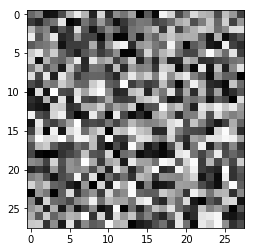

In [155]:
plt.imshow(start_x.reshape((28,28)),cmap='gray')

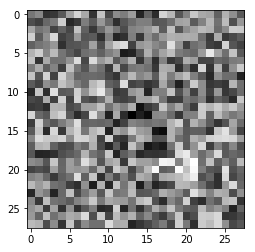

In [156]:
plt.imshow(x.reshape((28,28)),cmap='gray')

In [157]:
start_x

array([[0.40758312],
       [0.50104546],
       [0.06212217],
       [0.08604356],
       [0.29660817],
       [0.69572894],
       [0.91527528],
       [0.7073912 ],
       [0.13989263],
       [0.83901189],
       [0.17897075],
       [0.54900512],
       [0.45640362],
       [0.62562218],
       [0.00388756],
       [0.35677471],
       [0.03801568],
       [0.95577777],
       [0.82828303],
       [0.27999168],
       [0.49470598],
       [0.85076016],
       [0.71107173],
       [0.68227313],
       [0.30097058],
       [0.74729204],
       [0.59671967],
       [0.25240174],
       [0.23383684],
       [0.13457867],
       [0.37015623],
       [0.45671523],
       [0.89041845],
       [0.01494191],
       [0.08047314],
       [0.45422632],
       [0.29901806],
       [0.60313639],
       [0.34217776],
       [0.06145163],
       [0.21915362],
       [0.39221321],
       [0.4805539 ],
       [0.45987201],
       [0.25680756],
       [0.31567338],
       [0.41926015],
       [0.663

In [158]:
x

array([[ 4.28032938e-01],
       [ 5.27646821e-01],
       [ 6.66189526e-02],
       [ 9.75578016e-02],
       [ 2.72831781e-01],
       [ 6.66348855e-01],
       [ 9.38022772e-01],
       [ 7.05359320e-01],
       [ 7.26635583e-02],
       [ 8.49369029e-01],
       [ 1.92275917e-01],
       [ 5.54839851e-01],
       [ 4.71252059e-01],
       [ 6.38098069e-01],
       [-4.11735729e-03],
       [ 3.40003894e-01],
       [ 3.46151514e-02],
       [ 9.42058496e-01],
       [ 7.83672656e-01],
       [ 2.63744798e-01],
       [ 5.06372835e-01],
       [ 8.72874836e-01],
       [ 7.08615202e-01],
       [ 6.75290329e-01],
       [ 3.26219222e-01],
       [ 7.52325936e-01],
       [ 5.70601848e-01],
       [ 2.80121684e-01],
       [ 2.19193705e-01],
       [ 1.40668737e-01],
       [ 3.61730683e-01],
       [ 4.56007488e-01],
       [ 8.97007619e-01],
       [ 7.89829088e-03],
       [ 1.02853465e-01],
       [ 4.71369943e-01],
       [ 2.81415383e-01],
       [ 6.15063570e-01],
       [ 3.6

In [244]:
def what_nn_see(num,dim,epoch):
    fig = np.zeros((28*dim+dim+1,28*dim+dim+1))
    target = np.zeros((10,1))
    target[num,0] = 1
    epsilon = 0.12
    
    for pic in range(dim*dim):
        x = np.random.random((784,1)) * 255
        x = x/255
        start_x = x.copy()
        min_cost = 999
        print('turn:{}'.format(pic),end='')
        for i in range(epoch):
            a =  W1.dot(x)
            z = sigmoid(a)
            b = W2.dot(z)
            y = sigmoid(b)
            origin_x = x.copy()

            if i == 0 or np.linalg.norm(y-target) < min_cost:
                x_best = x
                min_cost = np.linalg.norm(y-target)

            x = x_best + np.random.random(x.shape) * epsilon * 2 - epsilon
            x[x>1] = 1
            x[x<0] = 0
            #print(min_cost)
        print(' cost=',min_cost)
        iloc = int(pic/dim)
        jloc = int(pic%dim)
        fig[iloc*28+iloc+1:iloc*28+iloc+1+28,jloc*28+jloc+1:jloc*28+jloc+1+28] = x.reshape((28,28))
    plt.imshow(fig,cmap='gray')

turn:0 cost= 1.0518418511389601e-11
turn:1 cost= 4.79133401303769e-12
turn:2 cost= 6.405457633168318e-12
turn:3 cost= 7.655062274066979e-12
turn:4 cost= 1.8981973538044874e-11
turn:5 cost= 6.685475045242314e-12
turn:6 cost= 1.476838526288802e-11
turn:7 cost= 1.3082259035595112e-11
turn:8 cost= 1.3323537987426625e-11


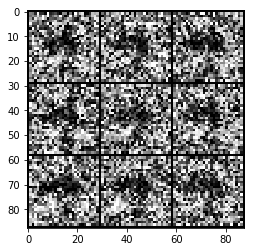

In [246]:
what_nn_see(2,3,10000)

turn:0 cost= 9.21997159904852e-07
turn:1 cost= 3.545289552057148e-07
turn:2 cost= 3.371688680264482e-05
turn:3 cost= 8.827967283611615e-07
turn:4 cost= 3.0337957579789687e-06
turn:5 cost= 8.933831184595803e-06
turn:6 cost= 5.357854747812183e-06
turn:7 cost= 2.8131682031881806e-06
turn:8 cost= 2.574697035337482e-06


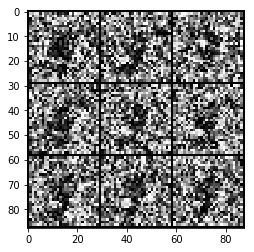

In [253]:
what_nn_see(9,3,10000)

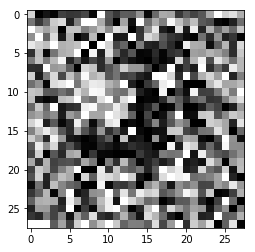

In [226]:
plt.imshow(x.reshape((28,28)),cmap='gray')

In [193]:
a =  W1.dot(x)
z = sigmoid(a)
b = W2.dot(z)
y = sigmoid(b)
print(y.argmax())

0


In [194]:
y

array([[1.00000000e+00],
       [9.82883976e-12],
       [1.70831235e-12],
       [3.99974063e-13],
       [7.41512454e-12],
       [3.54620874e-12],
       [1.09501032e-11],
       [3.61651915e-12],
       [9.11539552e-12],
       [1.78448868e-12]])

In [195]:
x

array([[0.00000000e+00],
       [1.00000000e+00],
       [6.15931996e-01],
       [7.08429052e-01],
       [6.54887559e-01],
       [3.29319935e-01],
       [7.62450352e-01],
       [8.51577919e-01],
       [1.88261708e-01],
       [0.00000000e+00],
       [9.40212066e-01],
       [8.95886407e-01],
       [4.64087432e-02],
       [1.67574199e-01],
       [6.81673502e-01],
       [6.80614428e-01],
       [1.01361001e-01],
       [5.84285045e-01],
       [8.43751815e-01],
       [3.58003741e-01],
       [4.53476809e-01],
       [4.75263463e-01],
       [9.70404287e-01],
       [5.36204898e-02],
       [6.09534515e-01],
       [0.00000000e+00],
       [7.29189866e-01],
       [7.28435916e-01],
       [2.32674439e-01],
       [6.26267393e-01],
       [9.43984892e-01],
       [3.75674794e-01],
       [7.69204863e-02],
       [9.62138720e-01],
       [5.90520507e-01],
       [7.87551806e-01],
       [3.62930004e-01],
       [2.88058957e-01],
       [4.12758135e-01],
       [1.98399835e-01],


In [196]:
x[x>0.5] = 1
x[x<0.5] = 0

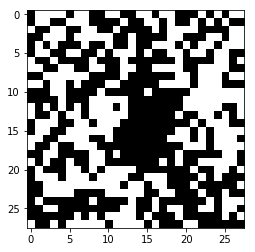

In [197]:
plt.imshow(x.reshape((28,28)),cmap='gray')

In [227]:
a = np.zeros((10,10))

In [228]:
a[1:,1:] = np.ones((2,2))

ValueError: could not broadcast input array from shape (2,2) into shape (9,9)